In [6]:
import numpy as np
import pandas as pd
import sympy as S
import sympy as sp
from sympy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [8]:
pd.options.display.max_rows = 10

# Entropia da informação

Estamos em posição de discutir a entropia da informação. Isso nos dará um
perspectiva poderosa sobre como a informação passa entre os experimentos, e irá
provam ser importantes em certos algoritmos de aprendizado de máquina.

Costumava haver um programa de TV em que o apresentador escondia um prêmio atrás
uma das três portas e o competidor teria que escolher uma das portas.
No entanto, antes de abrir a porta à escolha do concorrente, o anfitrião
abria uma das outras portas e perguntava à competidora se ela queria
mudar sua seleção. Este é o clássico problema de *Monty Hall*. o
A questão é se a competidora deve permanecer com sua escolha original ou mudar
depois de ver o que o anfitrião revelou? A partir da teoria da informação
perspectiva, o ambiente de informação muda quando o host revela
o que está atrás de uma das portas? O detalhe importante aqui é que o
host *nunca* abre a porta com o prêmio atrás dela, independentemente do
escolha do competidor. Ou seja, o anfitrião *sabe* onde está o prêmio, mas ele
não revela essa informação diretamente ao competidor. Isto é o
problemas fundamentais que a teoria da informação aborda --- como agregar e
razão sobre informações parciais. Precisamos de um conceito de informação que
pode acomodar esse tipo de pergunta.

## Conceitos da Teoria da Informação

O Shannon *conteúdo de informação* de um resultado $x$ é definido como,

$$
h(x) = \log_2\frac{1}{P(x)}
$$

onde $P(x)$ é a probabilidade de $x$. A *entropia* do conjunto
$X$ é definido como sendo o conteúdo de informação de Shannon de

$$
H(X) = \sum_x P(x) \log_2 \frac{1}{P(x)}
$$

Não é por acaso que a entropia tem essa forma funcional
como a expectativa de $h(x)$. Isso leva a uma teoria profunda e poderosa
de informação.

Para obter alguma intuição sobre o que significa entropia de informação, considere uma sequência
de números de três bits onde cada bit individual é igualmente provável. Assim, o
o conteúdo de informação individual de um único bit é $h(x) = \log_2 (2) = 1$. o
unidades de entropia são *bits* então isso diz que o conteúdo da informação de um único bit
é um pouco. Como o número de três bits tem elementos que são mutuamente
independente e igualmente provável, a entropia de informação do
número de três bits é $H(X) = 2^3 \times \log_2(2^3)/8=3 $. Desta forma,
a ideia básica de conteúdo de informação pelo menos faz sentido nesse nível.

Uma maneira melhor de interpretar essa pergunta é quanta informação eu teria
fornecer para codificar exclusivamente um número arbitrário de três bits? Nisso
Nesse caso, você teria que responder a três perguntas: *O primeiro bit é zero ou um?
O segundo bit é zero ou um? O terceiro bit é zero ou um?* Respondendo
essas perguntas especificam exclusivamente o número desconhecido de três bits. Porque o
bits são mutuamente independentes, sabendo o estado de qualquer um dos bits não
informar o restante.

Em seguida, vamos considerar uma situação que carece dessa independência mútua. Suponha
em um grupo de nove bolas idênticas, há uma mais pesada.
Além disso, também temos uma escala de medição que indica se um lado está
mais pesado, mais leve ou igual ao outro. Como poderíamos identificar o mais pesado
bola? Inicialmente, o conteúdo da informação, que mede a incerteza de
a situação é $\log_2(9)$ porque uma das nove bolas é mais pesada. [Figura](#fig:Information_Entropy_001) mostra
uma estratégia. Poderíamos selecionar arbitrariamente uma das bolas (mostrada pelo
quadrado), deixando os oito restantes para serem equilibrados. O grosso, preto
a linha horizontal indica a escala. Os itens abaixo e acima desta linha
indicam os lados contrabalançados da balança.

Uma bola pesada está escondida entre oito bolas idênticas. Ao pesar os grupos sequencialmente, podemos determinar a bola pesada.

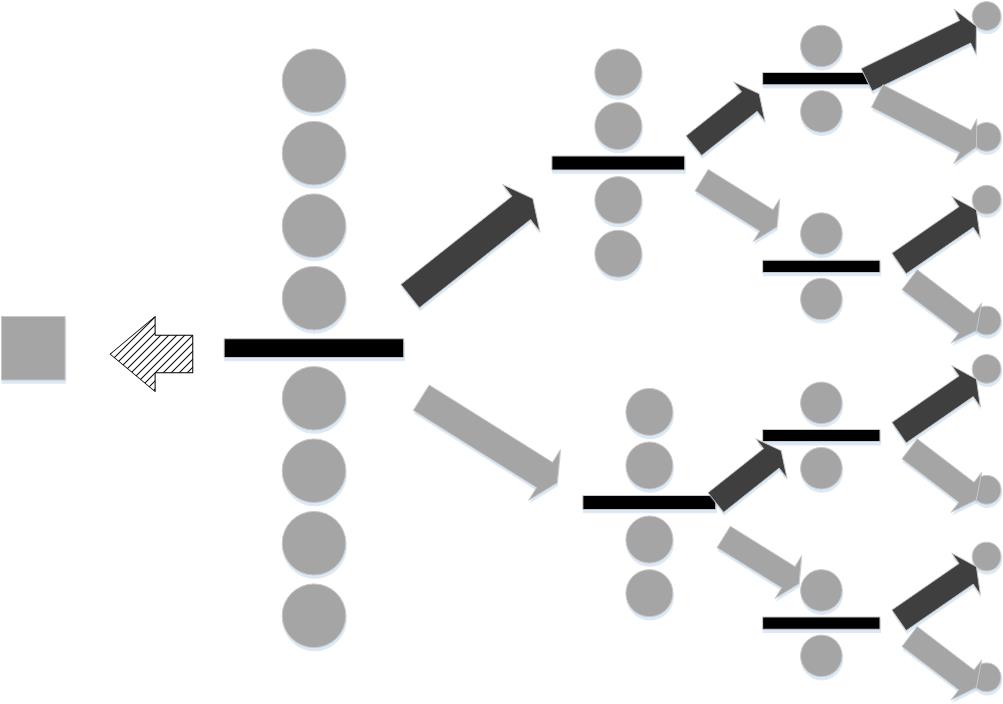

Se tivermos sorte, a balança informará que o grupo de quatro paredes em qualquer
lado da balança são iguais em peso. Isso significa que a bola que foi
omitido é o mais pesado. Isso é indicado pelo hash apontando para a esquerda
flecha. Nesse caso, toda a incerteza evaporou e o *informativo
valor* dessa pesagem é igual a $\log_2(9)$. Em outras palavras, a escala
reduziu a incerteza a zero (ou seja, encontrou a bola pesada). No outro
lado, a balança pode informar que o grupo superior de quatro bolas é mais pesado
(preta, seta apontando para cima) ou mais clara (cinza, seta apontando para baixo). Dentro
Neste caso, não podemos isolar a bola mais pesada até realizarmos todos os
pesagens indicadas, movendo-se da esquerda para a direita. Especificamente, as quatro bolas em
o lado mais pesado deve ser dividido por uma pesagem subsequente em duas bolas e
então para uma bola antes que a bola pesada possa ser identificada. Assim, este processo
faz três pesagens. O primeiro tem conteúdo informativo $\log_2(9/8)$, o
próximo tem $\log_2(4)$, e o último tem $\log_2(2)$. Somando tudo isso
soma $\log_2(9)$. Assim, esteja ou não a bola mais pesada isolada no
primeira pesagem, a estratégia consome $\log_2(9)$ bits, como deve, para encontrar o
bola pesada.

Para essa estratégia, as bolas são divididas em três grupos de tamanho igual e posteriormente pesadas.




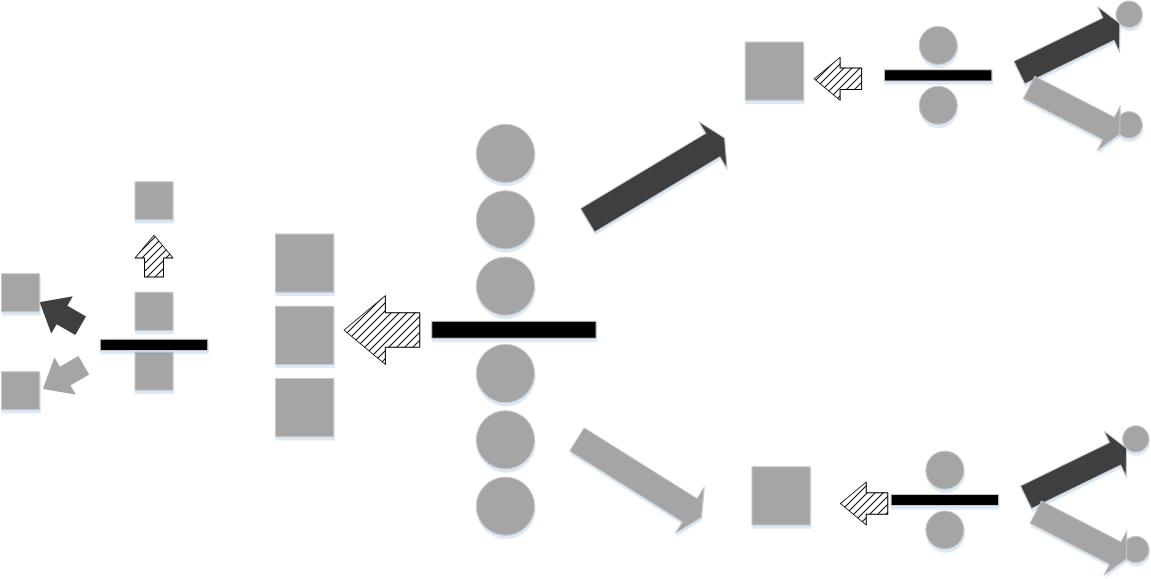 

No entanto, esta não é a única estratégia. [Figura](#fig:Information_Entropy_002)
mostra outro. Nesta abordagem, as nove bolas são divididas em três grupos
de três bolas cada. Dois grupos são pesados. Se tiverem o mesmo peso,
então isso significa que a bola mais pesada está no grupo que foi deixado de fora (tracejado
flecha). Então, esse grupo é dividido em dois grupos, com um elemento deixado de fora.
Se as duas bolas na balança tiverem o mesmo peso, significa que a excluída é
o pesado. Caso contrário, é uma das bolas da balança. o mesmo processo
segue se um dos grupos inicialmente pesados ​​é mais pesado (preto voltado para cima
seta) ou mais claro (seta cinza voltada para baixo). Como antes, o conteúdo da informação
da situação é $\log_2(9)$. A primeira pesagem reduz a incerteza de
a situação em $\log_2(3)$ e a ponderação subsequente a reduz em outro
$\log_2(3)$. Como antes, eles somam $\log_2(9)$, mas aqui só precisamos de dois
enquanto a primeira estratégia em [Figura](#fig:Informação_Entropia_001) leva
uma média de $1/9 + 3*8/9 \approx 2.78$ de pesagem, que é mais de dois.

Por que a segunda estratégia usa menos pesagens? Para reduzir as pesagens, precisamos
cada um pesando para julgar situações igualmente prováveis ​​quantas vezes
possível. Escolher uma das nove bolas no início (isto é, a primeira estratégia na
[Figura](#fig:Information_Entropy_001)) não faz isso porque o
a probabilidade de selecionar a bola correta é $1/9$. Isso não cria um
situação equiprovável no processo. A segunda estratégia deixa uma situação igualmente
situação provável em cada estágio (ver [Figura](#fig:Informação_Entropia_002)), então extrai o máximo de informação
cada pesagem possível. Assim, o conteúdo da informação nos diz quantos bits
informações devem ser resolvidas usando *qualquer* estratégia (ou seja, $\log_2(9)$ em
este exemplo). Ele também ilumina como remover a incerteza com eficiência;
ou seja, julgando situações equiprováveis ​​tantas vezes quanto possível.

## Propriedades da entropia da informação

Agora que temos o sabor dos conceitos, considere as seguintes propriedades
da entropia da informação,

$$
H(X) \ge 0
$$

com igualdade se e somente se $P(x)=1$ para exatamente um $x$.
Intuitivamente, isso significa que quando apenas um dos itens do conjunto é
conhecido absolutamente (isto é, com $P(x)=1$), a incerteza cai para zero.
Observe também que a entropia é maximizada quando $P$ é distribuído uniformemente em
os elementos do conjunto. Isso é ilustrado na figura para o caso de dois resultados. Em outras palavras,
a entropia da informação é maximizada quando as duas alternativas conflitantes são
igualmente provável. Esta é a razão matemática pela qual usar a escala no
último exemplo para julgar situações igualmente prováveis ​​foi tão útil para
abreviando o processo de pesagem.

In [9]:
S.init_printing()
p = S.symbols('p')

In [10]:
S.solve(S.diff(p*S.log(1/p,2) + (1-p)*S.log(1/(1-p),2),p),p)

<ipython-input-11-e59b8c772e29>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(p,p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)),'k-')
<ipython-input-11-e59b8c772e29>:4: RuntimeWarning: invalid value encountered in multiply
  ax.plot(p,p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)),'k-')


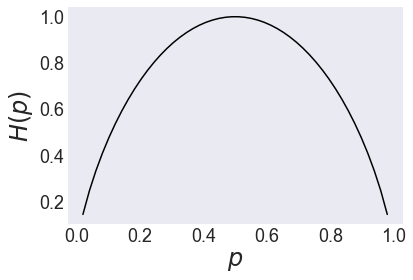

In [11]:
p = np.linspace(0,1,50)
fig,ax=plt.subplots()
#fig.set_size_inches((14,7))
ax.plot(p,p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)),'k-')
ax.set_xlabel('$p$',fontsize=24)
ax.set_ylabel('$H(p)$',fontsize=24)
ax.grid()

A entropia da informação é maximizada quando $p=1/2$.

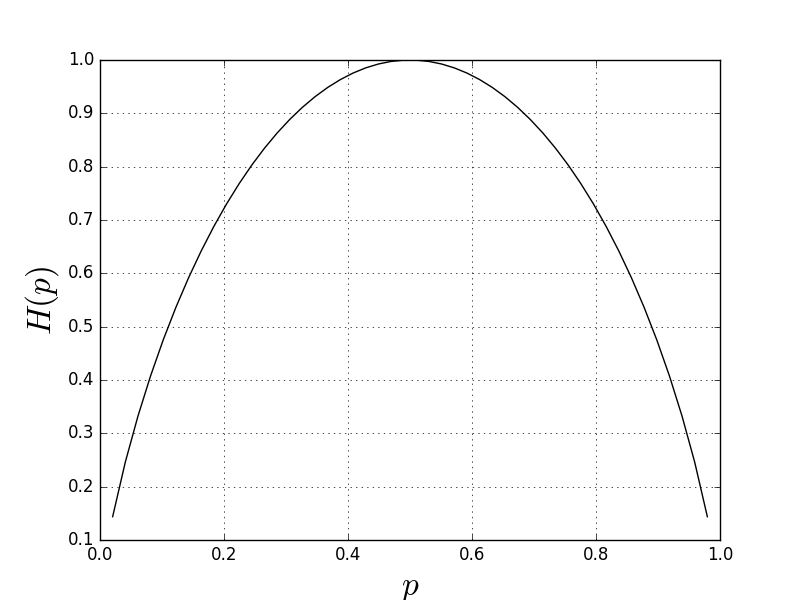

Mais importante ainda, o conceito de entropia se estende conjuntamente da seguinte forma,

$$
H(X,Y) = \sum_{x,y} P(x,y) \log_2 \frac{1}{P(x,y)}
$$

Se e somente se $X$ e $Y$ forem independentes, a entropia torna-se
aditivo,

$$
H(X,Y) =  H(X)+H(Y)
$$

## Divergência Kullback-Leibler

Noções de entropia de informação levam a noções de distância entre probabilidade
distribuições que se tornarão importantes para os métodos de aprendizado de máquina. o
Divergência de Kullback-Leibler entre duas distribuições de probabilidade $P$ e $Q$
que são definidos sobre o mesmo conjunto é definido como,

$$
D_{KL}(P,Q) = \sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

Observe que $D_{KL}(P,Q) \ge 0$ com igualdade se e somente se $P=Q$.
Às vezes, a divergência de Kullback-Leibler é chamada de Kullback-Leibler
distância, mas não é formalmente uma métrica de distância porque é assimétrica
em $P$ e $Q$. A divergência de Kullback-Leibler define uma entropia relativa como
a perda de informação se $P$ for modelado em termos de $Q$. Há um
maneira intuitiva de interpretar a divergência de Kullback-Leibler e entender sua
falta de simetria. Suponha que temos um conjunto de mensagens para transmitir, cada uma com um
probabilidade correspondente $\lbrace
(x_1,P(x_1)),(x_2,P(x_2)),\ldots,(x_n,P(x_n)) \rbrace$. Com base no que sabemos
sobre a entropia da informação, faz sentido codificar o comprimento da mensagem
por $\log_2 \frac{1}{p(x)}$ bits. Esta estratégia parcimoniosa significa que mais
mensagens frequentes são codificadas com menos bits. Assim, podemos reescrever a entropia
da situação como antes,

$$
H(X) = \sum_{k} P(x_k) \log_2 \frac{1}{P(x_k)}
$$

Agora, suponha que queremos transmitir o mesmo conjunto de mensagens, mas com um
conjunto diferente de pesos de probabilidade, $\lbrace
(x_1,Q(x_1)),(x_2,Q(x_2)),\ldots,(x_n,Q(x_n)) \rbrace$. Nesta situação, nós
pode definir a entropia cruzada como

$$
H_q(X) = \sum_{k} P(x_k) \log_2 \frac{1}{Q(x_k)}
$$

Observe que apenas o comprimento pretendido da mensagem codificada foi
alterado, não a probabilidade dessa mensagem. A diferença entre esses dois
é a divergência de Kullback-Leibler,

$$
D_{KL}(P,Q)=H_q(X)-H(X)=\sum_x P(x) \log_2 \frac{P(x)}{Q(x)}
$$

A esta luz, a divergência de Kullback-Leibler é a média
diferença nos comprimentos codificados do mesmo conjunto de mensagens em dois
diferentes regimes de probabilidade. Isso deve ajudar a explicar a falta de simetria de
a divergência Kullback-Leibler --- deixados por conta própria, $P$ e $Q$
forneça as codificações de comprimento ideal separadamente, mas pode não haver necessidade
simetria em como cada regime classificaria o valor informativo de cada mensagem
($Q(x_i)$ versus $P(x_i)$). Dado que cada codificação é de tamanho ideal em sua
próprio regime significa que deve, portanto, ser pelo menos subótimo em outro,
dando origem à divergência de Kullback-Leibler. No caso em que o
comprimento de codificação de todas as mensagens permanece o mesmo para os dois regimes, então o
A divergência de Kullback-Leibler é zero.

A melhor apresentação deste material, fácil de entender, é o capítulo
quatro do texto de Mackay.

# Funções Geradoras de Momento

A geração de momentos geralmente envolve integrais que são extremamente
difícil de calcular. As funções geradoras de momentos tornam isso muito, muito
mais fácil. A função geradora de momento é definida como

$$
M(t) = \mathbb{E}(\exp(t X))
$$

O primeiro momento é a média, que podemos calcular facilmente a partir de
$M(t)$ como,

$$
\begin{align*}
\frac{dM(t)}{dt} &= \frac{d}{dt}\mathbb{E}(\exp(t X)) = \mathbb{E}\frac{d}{dt}(\exp(t X))\\\
                 &= \mathbb{E}(X \exp(t X))  \\\
\end{align*}
$$

Agora, temos que definir $t=0$ e temos a média,

$$
M^{(1)}(0) = \mathbb{E}(X)
$$

continuando este processo derivativo novamente, obtemos o segundo momento como,

$$
\begin{align*}
M^{(2)}(t) &= \mathbb{E}(X^2\exp(t X)) \\\
M^{(2)}(0) &= \mathbb{E}(X^2)
\end{align*}
$$

Com isso em mãos, podemos facilmente calcular a variância como,

$$
\mathbb{V}(X) = \mathbb{E}(X^2) -\mathbb{E}(X)^2=M^{(2)}(0)-M^{(1)}(0)^2
$$

In [12]:
p,t = S.symbols('p t',positive=True)
x = stats.Binomial('x',10,p)
mgf = stats.E(S.exp(t*x))

Agora, vamos calcular o primeiro momento (também conhecido como média) usando
o método de integração usual e usando funções de geração de momento,

In [13]:
S.simplify(stats.E(x))

In [14]:
S.simplify(S.diff(mgf,t).subs(t,0))

Caso contrário, podemos calcular isso diretamente da seguinte maneira,

In [15]:
S.simplify(stats.moment(x,1)) # mean

In [16]:
S.simplify(stats.moment(x,2)) # 2nd moment

In [17]:
S.simplify(S.diff(S.diff(mgf,t),t).subs(t,0))

Em geral, a função geradora de momento para o binômio
distribuição é a seguinte,

$$
M_X(t) = \left(p\left(e^t-1\right)+1\right) ^n
$$

Um aspecto fundamental das funções geradoras de momentos é que elas são identificadores únicos
de distribuições de probabilidade. Pelo teorema da unicidade, dados dois
variáveis ​​$X$ e $Y$, se suas respectivas funções geradoras de momento forem
iguais, então as funções de distribuição de probabilidade correspondentes são iguais.

**Exemplo.** Vamos usar o teorema da unicidade para considerar o seguinte
problema. Suponha que saibamos que a distribuição de probabilidade de $X$ dado $U=p$
é binomial com parâmetros $n$ e $p$. Por exemplo, suponha que $X$ representa o
número de caras em $n$ cara ou coroa, dada a probabilidade de caras é $p$. Nós
deseja encontrar a distribuição incondicional de $X$. Escrevendo o
função de geração de momento como o seguinte,

$$
\mathbb{E}(e^{t X}\vert U=p) = (p e^t + 1-p)^n
$$

Como $U$ é uniforme ao longo do intervalo unitário, podemos
integrar esta parte fora

$$
\begin{align*}
\mathbb{E}(e^{t X}) &=\int_0^1 (p e^t + 1-p)^n dp \\\
                    &= \frac{1}{n+1} \frac{1-e^{t(n+1)}}{1-e^t} \\\
                    &= \frac{1}{n+1} (1+e^t+e^{2t}+e^{3t}+\ldots+e^{n t}) \\\
\end{align*}
$$

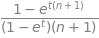

In [18]:
p,t,n = S.symbols('p t n',positive=True)

S.simplify(S.integrate((p*S.exp(t)+1-p)**n,(p,0,1)))

Assim, a função geradora de momentos de $X$ corresponde à de um
variável aleatória que tem a mesma probabilidade de ser qualquer um dos valores $0,1,\ldots,n$.
Esta é outra maneira de dizer que a distribuição de $X$ é uniforme discreta
sobre $\lbrace 0,1,\ldots,n \rbrace$. Concretamente, suponha que temos uma caixa de moedas
cuja probabilidade individual de caras é desconhecida e que despejamos a caixa em
no chão, derramando todas as moedas. Se contarmos o número de moedas voltadas para
heads-up, essa distribuição é uniforme.

As funções geradoras de momentos são úteis para derivar distribuições de
somas de variáveis ​​aleatórias independentes. Suponha que $X_0$ e $X_1$ sejam independentes
e $Y=X_0+X_1$. Então, a função geradora de momento de $Y$ segue
das propriedades da expectativa,

$$
\begin{align*}
M_Y(t) &= \mathbb{E}(e^{t Y}) =  \mathbb{E}(e^{t X_0 + t X_1}) \\\
       &= \mathbb{E}(e^{t X_0} e^{ t X_1 }) =\mathbb{E}(e^{t X_0})\mathbb{E}(e^{t X_1}) \\\
       &= M_{X_0}(t)M_{X_1}(t)
\end{align*}
$$

**Exemplo.** Suponha que temos duas variáveis ​​aleatórias normalmente distribuídas,
$X_0\sim \mathcal{N}(\mu_0,\sigma_0)$ e $ X_1\sim \mathcal{N}(\mu_1,\sigma_1)$.
Podemos poupar algum tédio explorando isso no Sympy,

In [19]:
S.var('x:2',real=True)
S.var('mu:2',real=True)
S.var('sigma:2',positive=True)
S.var('t',positive=True)
x0 = stats.Normal(x0,mu0,sigma0)
x1 = stats.Normal(x1,mu1,sigma1)

**Dica de programação.**

A função `S.var` define a variável e a injeta no global
namespace. Isso é pura preguiça. É mais expressivo definir variáveis
explicitamente como em `x = S.symbols('x')`. Observe também que usamos os nomes gregos
para as variáveis ​​`mu` e `sigma`. Isso será útil mais tarde, quando quisermos
para renderizar as equações no notebook Jupyter/IPython que entende
como compor esses símbolos em \LaTeX{}. O `var('x:2')` cria dois
símbolos, `x0` e `x1`. Usar os dois pontos dessa maneira facilita a geração
sequências de símbolos semelhantes a matrizes.



 No próximo bloco, calculamos as funções geradoras de momento

In [20]:
mgf0 = S.simplify(stats.E(S.exp(t*x0)))
mgf1 = S.simplify(stats.E(S.exp(t*x1)))
mgfY = S.simplify(mgf0*mgf1)

In [21]:
mgf0

In [22]:
mgf1

In [23]:
mgfY

As funções geradoras de momento um indivíduo normalmente distribuído
variável aleatória é a seguinte,

$$
e^{\mu_{0} t + \frac{\sigma_{0}^{2} t^{2}}{2}}
$$

Observe os coeficientes de $t$. Para mostrar que $Y$ é normalmente
distribuído, queremos casar a função geradora de momento de $Y$ com este
formato. A seguir está a forma da função geradora de momento de $Y$,

$$
M_Y(t)=e^{\frac{t}{2} \left(2 \mu_{0} + 2 \mu_{1} + \sigma_{0}^{2} t + \sigma_{1}^{2} t\right)}
$$

Podemos extrair o expoente usando Sympy e coletar no $t$
variável usando o seguinte código,

In [24]:
S.log(mgfY)

In [25]:
S.collect(S.expand(S.log(mgfY)),t)

Assim, pelo teorema da unicidade, $Y$ é normalmente distribuído com
$\mu_Y=\mu_0+\mu_1$ e $\sigma_Y^2=\sigma_0^2+\sigma_1^2$.

**Dica de programação.**

Ao usar o notebook Jupyter/IPython, você pode fazer `S.init_printing` para obter
a composição matemática para funcionar no navegador. Caso contrário, se você quiser
manter a expressão bruta e renderizar seletivamente para \LaTeX{}, então você pode
`from IPython.display import Math`, e então use `Math(S.latex(expr))` para ver
a versão tipográfica da expressão.

In [26]:
x0 = np.random.normal(3,2,size=1000)
x1 = np.random.normal(4,1,size=1000)

In [27]:
y = x0+x1

In [28]:
x = S.symbols('x')
x = stats.Normal(x,7,S.sqrt(5))

In [29]:
gauss_s = S.lambdify(x,S.stats.density(x)(x))

In [30]:
def gauss_(x,mu,sigma):
    return (1/np.sqrt(np.pi*2*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

In [31]:
xrange = np.linspace(0,15)

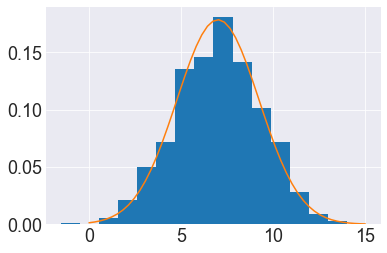

In [32]:
plt.hist(y,bins=15,density=True);
plt.plot(xrange, gauss_s(xrange))

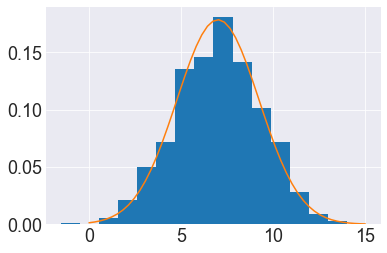

In [33]:
plt.hist(y,bins=15,density=True);
plt.plot(xrange, gauss_(xrange,7,np.sqrt(5)))

# Métodos de amostragem de Monte Carlo

Até agora, estudamos formas analíticas de transformar variáveis ​​aleatórias e como
para aumentar esses métodos usando Python. Apesar de tudo isso, frequentemente devemos
recorrer a métodos puramente numéricos para resolver problemas do mundo real. Esperançosamente,
agora que vimos a teoria mais profunda, esses métodos numéricos parecem mais
concreto. Suponha que queremos gerar amostras de uma determinada densidade, $f(x)$,
dado já podemos gerar amostras de uma distribuição uniforme,
$\mathcal{U}[0,1]$. Como sabemos que uma amostra aleatória $v$ vem do $f(x)$
distribuição? Uma abordagem é observar como um histograma de amostras de $v$
aproxima de $f(x)$. Especificamente,


$$
\begin{equation}
\mathbb{P}( v \in N_{\Delta}(x) )  = f(x) \Delta x 
\end{equation}
\label{eq:mc01} \tag{1}
$$

O histograma aproxima a densidade de probabilidade alvo.

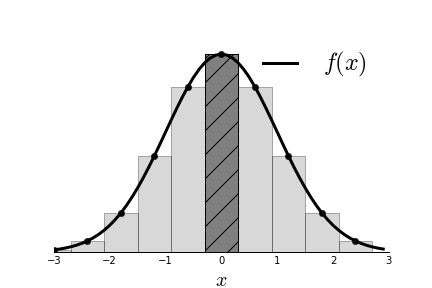

 que diz que a probabilidade de uma amostra estar em algum $N_\Delta$
vizinhança de $x$ é aproximadamente $f(x)\Delta x$. A figura mostra a função de densidade de probabilidade alvo
$f(x)$ e um histograma que o aproxime. O histograma é gerado a partir
amostras $v$. O retângulo sombreado no centro ilustra a Equação (1). A área desse retângulo é aproximadamente $f(x)\Delta x$ onde
$x=0$, neste caso. A largura do retângulo é $N_{\Delta}(x)$ A qualidade
da aproximação pode ser claro visualmente, mas saber que $v$ amostras são
caracterizada por $f(x)$, precisamos da demonstração da Equação (1), que
diz que a proporção de amostras $v$ que preenchem o retângulo hachurado é
aproximadamente igual a $f(x)\Delta x$.

Agora que sabemos como avaliar as amostras $v$ que são caracterizadas pela densidade
$f(x)$, vamos considerar como criar essas amostras para valores discretos e
variáveis ​​aleatórias contínuas.

## Método CDF Inverso para Variáveis ​​Discretas

Suponha que desejamos gerar amostras de um dado honesto de seis lados. nossa casa de trabalho
variável aleatória uniforme é definida continuamente ao longo do intervalo da unidade e o
um dado justo de seis lados é discreto. Devemos primeiro criar um mapeamento entre o
variável aleatória contínua $u$ e os resultados discretos do dado. este
mapeamento é mostrado na figura, onde a unidade
intervalo é dividido em segmentos, cada um com comprimento $1/6$. Cada indivíduo
segmento é atribuído a um dos resultados do dado. Por exemplo, se $u \in
[1/6,2/6)$, então o resultado do dado é $2$. Porque o dado é justo, todos
segmentos no intervalo de unidade são do mesmo comprimento. Assim, nosso novo aleatório
a variável $v$ é derivada de $u$ por esta atribuição.

Uma variável aleatória de distribuição uniforme no intervalo da unidade é atribuída aos seis resultados de um dado justo usando esses segmentos.

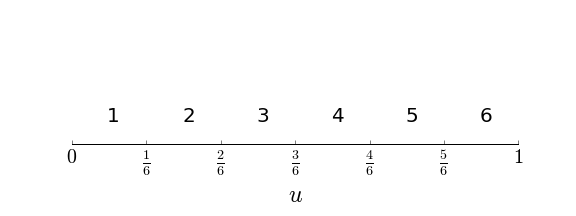

Por exemplo, para $v=2$, temos,

$$
\mathbb{P}(v=2) = \mathbb{P}(u\in [1/6,2/6)) = 1/6
$$

onde, na linguagem da Equação (1), $f(x)=1$
(distribuição uniforme), $\Delta x = 1/6$, e $N_\Delta (2)=[1/6,2/6)$.
Naturalmente, esse padrão é válido para todos os outros resultados de dados em
$\left\{1,2,3,..,6\right\}$. Vamos considerar uma simulação rápida para fazer isso
concreto. O código a seguir gera amostras aleatórias uniformes e as empilha
em um dataframe do Pandas.

In [34]:
u = np.random.rand(10000)
df = pd.DataFrame(data=u,columns=['u'])

In [35]:
df

,u
0,0.502964
1,0.899455
2,0.741388
3,0.321797
4,0.218634
...,...
9995,0.630168
9996,0.786153
9997,0.172982
9998,0.041250


O próximo bloco usa `pd.cut` para mapear as amostras individuais para o conjunto $\left\{1,2,\ldots,6\right\}$ rotulado como `v`.

In [36]:
np.linspace(0,1,7)

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

In [37]:
labels = [1,2,3,4,5,6]
df['v']=pd.cut(df.u,np.linspace(0,1,7),
               include_lowest=True,labels=labels)

In [38]:
df

,u,v
0,0.502964,4
1,0.899455,6
2,0.741388,5
3,0.321797,2
4,0.218634,2
...,...,...
9995,0.630168,4
9996,0.786153,5
9997,0.172982,2
9998,0.041250,1


Isso é o que o dataframe contém. A coluna `v` contém as amostras retiradas do dado justo.

O seguinte é uma contagem do número de amostras em cada grupo. Lá deve ser aproximadamente o mesmo número de amostras em cada grupo porque o dado é justo.

In [39]:
100/6.

In [40]:
df.groupby('v').count()

,u
v,
1,1672
2,1675
3,1647
4,1651
5,1660
6,1695


Até agora tudo bem. Agora temos uma forma de simular uma feira
morrer de uma variável aleatória uniformemente distribuída.

Para estender isso ao dado injusto, precisamos apenas fazer alguns pequenos ajustes neste
código. Por exemplo, suponha que queremos um dado injusto para que
$\mathbb{P}(1)=\mathbb{P}(2)=\mathbb{P}(3)=1/12$ e
$\mathbb{P}(4)=\mathbb{P}(5)=\mathbb{P}(6)=1/4$. A única mudança que temos que
make é com `pd.cut` como segue,

In [41]:
df['v']=pd.cut(df.u,[0,1/12,2/12,3/12,2/4,3/4,1],
               include_lowest=True,labels=labels)

In [42]:
df.groupby('v').count()/df.shape[0]

,u
v,
1,0.0825
2,0.0847
3,0.0843
4,0.2479
5,0.2494
6,0.2512


In [43]:
(1/12.,1/4)

onde agora estas são as probabilidades individuais de cada dígito. Você
pode levar mais de '100' amostras para obter uma visão mais clara do indivíduo
probabilidades, mas o mecanismo para gerá-las é o mesmo. o método é
chamado de método CDF inverso [^CDF] porque o CDF
(ou seja,$\texttt{[0,1/12,2/12,3/12,2/4,3/4,1]}$) no último exemplo foi
invertido (usando o método `pd.cut`) para gerar as amostras.
A inversão é mais fácil de ver para variáveis ​​contínuas, que consideramos
próximo.

[^CDF]: Função de densidade cumulativa. Ou seja, $F(x)=\mathbb{P}(X < x)$.


## Método CDF Inverso para Variáveis ​​Contínuas

O método acima se aplica a variáveis ​​aleatórias contínuas, mas agora temos que usar
reduza os intervalos a pontos individuais. No exemplo acima, nosso
A função inversa era uma função por partes que operava em padrões aleatórios uniformes.
amostras. Nesse caso, a função por partes colapsa para uma inversa contínua
função. Queremos gerar amostras aleatórias para um CDF que é invertível.
Como antes, o critério para gerar uma amostra apropriada $v$ é o
Segue,

$$
\mathbb{P}(F(x) < v < F(x+\Delta x)) =  F(x+\Delta x) - F(x) = \int_x^{x+\Delta x} f(u) du \approx  f(x) \Delta x
$$

que está dizendo que a probabilidade de que a amostra $v$ esteja contida
em um intervalo $\Delta x$ é aproximadamente igual à função de densidade, $f(x)
\Delta x$, nesse ponto. Mais uma vez, o truque é usar um padrão aleatório uniforme
amostra $u$ e um CDF invertível $F(x)$ para construir essas amostras. Observação
que para uma variável aleatória uniforme $u \sim \mathcal{U}[0,1]$, temos,

$$
\begin{align*}
\mathbb{P}(x < F^{-1}(u) < x+\Delta x) & = \mathbb{P}(F(x) < u < F(x+\Delta x)) \\\
                                       & =  F(x+\Delta x) - F(x) \\\
                                       & = \int_x^{x+\Delta x} f(p) dp \approx  f(x) \Delta x
\end{align*}
$$

Isso significa que $ v=F^{-1}(u) $ é distribuído de acordo com $f(x)$,
que é o que queremos.

Vamos tentar isso para gerar amostras do
distribuição exponencial,

$$
f_{\alpha}(x) = \alpha e^{ -\alpha x }
$$

que tem o seguinte CDF,

$$
F(x) = 1-e^{ -\alpha x  }
$$

e a inversa correspondente,

$$
F^{-1}(u)  = \frac{1}{\alpha}\ln \frac{1}{(1-u)}
$$

Agora, tudo o que temos a fazer é gerar alguns uniformemente distribuídos
amostras aleatórias e, em seguida, alimentá-los em $F^{-1}$.

In [44]:
from numpy import array, log
import scipy.stats
alpha = 1.   # distribution parameter
nsamp = 10000 # num of samples
# define uniform random variable
u = scipy.stats.uniform(0,1)
# define inverse function
Finv = lambda u: (1/alpha)*log(1/(1-u))
# apply inverse function to samples
v = array(list(map(Finv,u.rvs(nsamp))))

In [45]:
v

array([0.03492661, 0.36232898, 0.79690677, ..., 0.56485038, 1.07962419,
       0.12109928])

In [46]:
u.rvs(nsamp)

array([0.28027346, 0.98972703, 0.77228363, ..., 0.41878258, 0.77090914,
       0.60716546])

Agora, temos as amostras da distribuição exponencial, mas como
sabemos que o método está correto com as amostras distribuídas de acordo?
Felizmente, `scipy.stats` já tem uma distribuição exponencial, então podemos
verifique nosso trabalho com a referência usando um *gráfico de probabilidade* (ou seja, também
conhecido como gráfico *quantil-quantil*). O código a seguir configura o
gráfico de probabilidade de `scipy.stats`.

((array([-2.81060943, -2.58545756, -2.46184782, ...,  4.46184782,
          4.58545756,  4.81060943]),
  array([4.20033368e-05, 2.16292067e-04, 3.44558956e-04, ...,
         7.53120674e+00, 7.68809905e+00, 8.64824789e+00])),
 (0.8873348972476425, 0.10509581791858547, 0.9067082951558819))

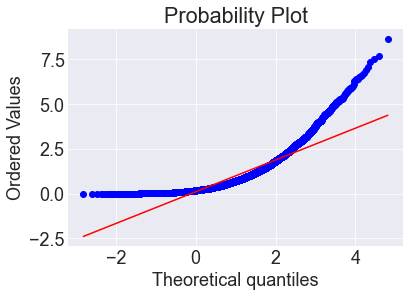

In [47]:
f, ax = plt.subplots()
scipy.stats.probplot(v,(1,),dist='norm',plot=ax,)

Text(0.5, 1.0, 'Probability Plot')

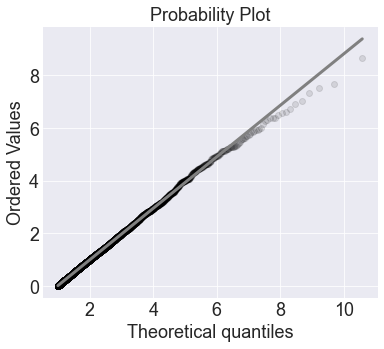

In [48]:
from matplotlib.pylab import setp, subplots

fig, ax = plt.subplots()
fig.set_size_inches((6,5))


scipy.stats.probplot(v,(1,),dist='expon',plot=ax)
line=ax.get_lines()[0]
setp(line,'color','k')
setp(line,'alpha',.1)
line=ax.get_lines()[1]
setp(line,'color','gray')
setp(line,'lw',3.0)
setp(ax.yaxis.get_label(),'fontsize',18)
setp(ax.xaxis.get_label(),'fontsize',18)
ax.set_title('Probability Plot',fontsize=18)
#ax.grid()
#fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_005.png')

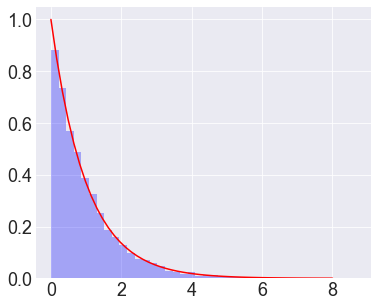

In [49]:
f, ax = plt.subplots(figsize=(6,5))
ax.hist(v,density=1,bins=40,alpha=.3,color='blue');
x = np.linspace(0,8)
ax.plot(x, np.exp(-x), color='red');

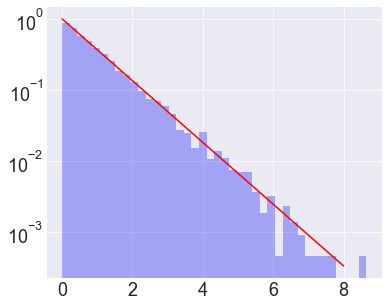

In [50]:
f, ax = plt.subplots(figsize=(6,5))
ax.hist(v,density=1,bins=40,alpha=.3,color='blue',log=True);
x = np.linspace(0,8)
ax.semilogy(x, np.exp(-x), color='red');

Observe que temos que fornecer um objeto de eixos (`ax`) para ele desenhar.
O resultado é a figura. Quanto mais as amostras linha coincidem com a linha diagonal, mais coincidem com a distribuição de referência (ou seja, distribuição exponencial neste caso). Você também pode querer tentar `dist=norm` no código acima Para ver o que acontece quando a distribuição normal é a distribuição de referência.

As amostras criadas usando o método cdf inverso correspondem à distribuição de referência exponencial.

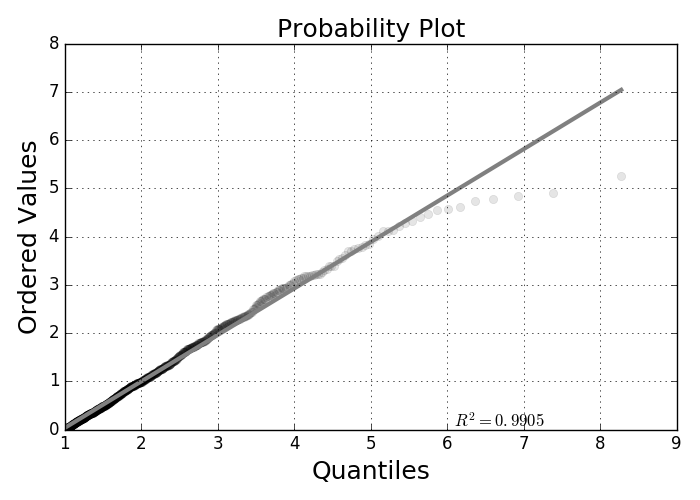


## Método de Rejeição

Em alguns casos, inverter o CDF pode ser impossível. A *rejeição*
pode lidar com essa situação. A ideia é escolher dois uniformes aleatórios
variáveis ​​$u_1,u_2 \sim \mathcal{U}[a,b]$ para que

$$
\mathbb{P}\left(u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{f(u_1)}{M} \right) \hspace{0.5em} \approx \frac{\Delta x}{b-a} \frac{f(u_1)}{M}
$$

onde tomamos $x=u_1$ e $f(x) < M $. Este é um processo de duas etapas.
Primeiro, desenhe $u_1$ uniformemente a partir do intervalo $[a,b]$. Em segundo lugar, alimentá-lo em
$f(x)$ e se $u_2 < f(u_1)/M$, então você tem uma amostra válida para $f(x)$. Desta forma,
$u_1$ é a amostra proposta de $f$ que pode ou não ser rejeitada dependendo
em $u_2$. A única tarefa da constante $M$ é reduzir a escala de $f(x)$ para que
a variável $u_2$ pode abranger o intervalo. A *eficiência* deste método é a
probabilidade de aceitar $u_1$ que vem da integração do acima
aproximação,

$$
\int \frac{f(x)}{M(b-a)} dx = \frac{1}{M(b-a)} \int f(x)dx =\frac{1}{M(b-a)}
$$

Isso significa que não queremos $M$ desnecessariamente grandes porque isso
torna mais provável que as amostras sejam descartadas.

Vamos tentar este método para uma densidade que não possui uma inversa contínua [^normalization].

[^normalization]: Note que este exemplo de densidade não integra *exatamente*
para um como uma função de densidade de probabilidade deveria, mas a normalização
constante para isso é uma distração para nossos propósitos aqui.

$$
f(x) = \exp\left(-\frac{(x-1)^2}{2x} \right) (x+1)/12
$$

onde $x>0$. O código a seguir implementa o plano de rejeição.

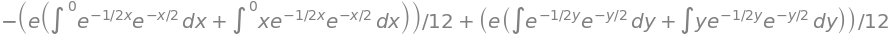

In [51]:
x,y = S.symbols('x, y')
S.integrate(S.exp(-(x-1)**2/2/x)*(x+1)/12,(x,0,y))

In [52]:
x = np.linspace(0.001,15,100)

def f(x):
    return(np.exp(-(x-1)**2/2./x)*(x+1)/12.)

M = .5 # scale factor

u1 = np.random.rand(10000)*15  # uniform random samples scaled out [0,15]
u2 = np.random.rand(10000)     # uniform random samples [0,1]

idx = u2<=f(u1)/M

v = u1[idx]

In [53]:
len(v)

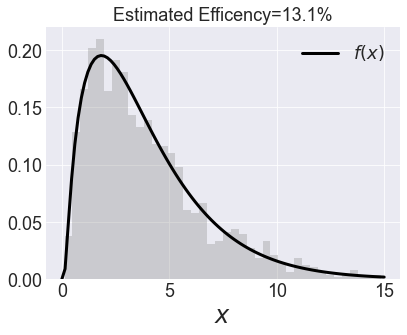

In [54]:
fig,ax = plt.subplots(figsize=(6,5))

ax.hist(v,density=True,bins=40,alpha=.3,color='gray')
ax.plot(x,f(x),'k',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency={:.1f}%'.format(100*len(v)/len(u1)),
             fontsize=18)
ax.legend(fontsize=18)
ax.set_xlabel('$x$',fontsize=24)

fig.tight_layout()

A figura mostra um histograma do amostras assim geradas que se ajustam perfeitamente à função de densidade de probabilidade. o
título na figura mostra a eficiência, que é pobre. Isso significa que jogamos afastado a maioria das amostras propostas. Assim, embora não haja nada conceitualmente errado com este resultado, a baixa eficiência deve ser corrigida, como questão prática. A figura mostra onde o amostras propostas foram rejeitadas. As amostras sob a curva foram retidas (ou seja, $u_2 < \frac{f(u_1)}{M}$) mas a grande maioria das amostras estão fora deste guarda-chuva.

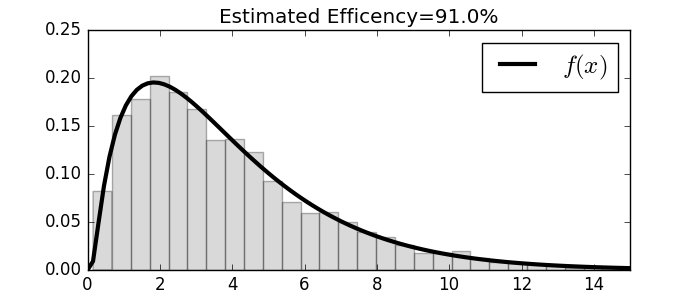

O método de rejeição gera amostras no histograma que correspondem perfeitamente à distribuição de destino. Infelizmente, a eficiência não é tão boa.

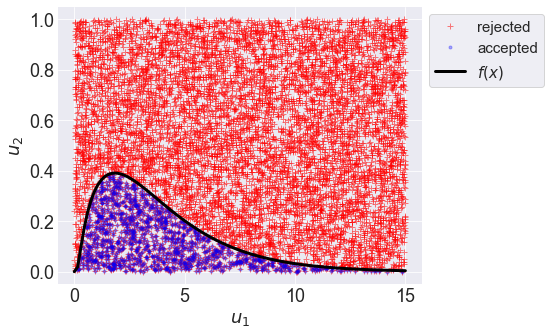

In [55]:
fig,ax = plt.subplots(figsize=(8,5))

ax.plot(u1, u2,'+',label='rejected',alpha=.5,color='red')
ax.plot(u1[idx],u2[idx],'.',label='accepted',alpha=.3,color='blue')
ax.plot(x,f(x)/M,'k',lw=3.,label='$f(x)$')
ax.legend(fontsize=15,loc="upper left", bbox_to_anchor=(1,1),frameon=True,fancybox=True)
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_008.png')

As amostras propostas sob a curva foram aceitas e as demais não. Isso mostra que a maioria das amostras foi rejeitada.

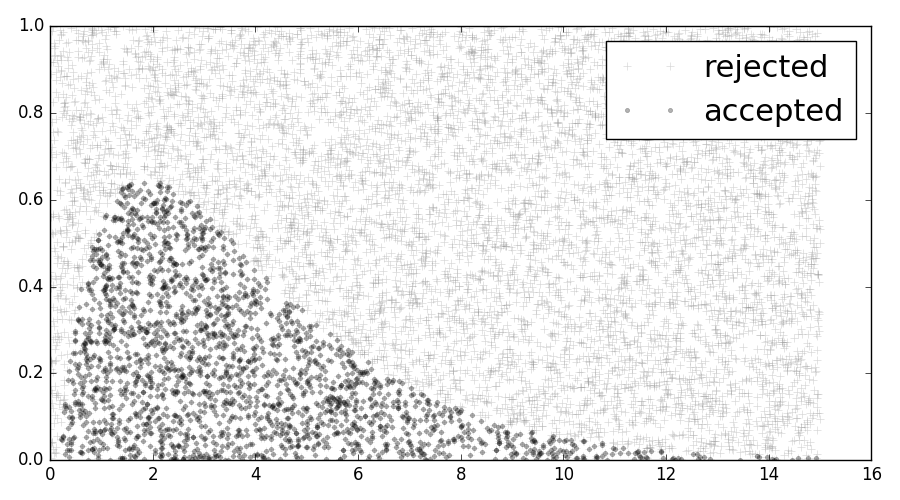


O método de rejeição usa $u_1$ para selecionar ao longo do domínio de $f(x)$ e o
outra variável aleatória uniforme $u_2$ decide se aceita ou não. uma ideia
seria escolher $u_1$ para que os valores de $x$ sejam coincidentemente os que são
perto do pico de $f(x)$, em vez de uniformemente em qualquer lugar do domínio,
especialmente perto das caudas, que são de baixa probabilidade de qualquer maneira. Agora, o truque é
para encontrar uma nova função de densidade $g(x)$ para amostrar que tenha um similar
concentração de densidade de probabilidade. Uma maneira de se familiarizar com
as funções de densidade de probabilidade que têm parâmetros ajustáveis ​​e rápido aleatório
geradores de amostra já. Há muitos lugares para procurar e, provavelmente,
provavelmente já existe um gerador para o seu problema. Caso contrário, o
família de densidades $\beta$ é um bom lugar para começar.

Para ser explícito, o que queremos é $u_1 \sim g(x)$ para que, voltando ao nosso
argumento anterior,

$$
\mathbb{P}\left( u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{f(u_1)}{M} \right) \approx g(x) \Delta x \frac{f(u_1)}{M}
$$

mas isso *não* é o que precisamos aqui. O problema é com o
segunda parte da conjunção lógica $\bigwedge$. precisamos colocar
algo ali que nos dará algo proporcional a $f(x)$.
Vamos definir o seguinte,

$$
\begin{equation}
 h(x) = \frac{f(x)}{g(x)} 
\end{equation}
\label{eq:rej01} \tag{2}
$$

com máximo correspondente no domínio como $h_{\max}$ e
então volte e construa a segunda parte da cláusula como

$$
\mathbb{P}\left(u_1 \in N_{\Delta}(x) \bigwedge u_2 < \frac{h(u_1)}{h_{\max}} \right) \approx g(x) \Delta x \frac{h(u_1)}{h_{\max}} = f(x)/h_{\max}
$$

Lembre-se de que satisfazer esse critério significa que $u_1=x$. Como antes,
podemos estimar a probabilidade de aceitação do $u_1$ como $1/h_{\max}$.

Agora, como construir a função $g(x)$ no denominador da Equação
(2)? Aqui é onde a familiaridade com algumas densidades de probabilidade padrão
compensa. Para este caso, escolhemos a distribuição qui-quadrada. A seguir
plota $g(x)$ e $f(x)$ (gráfico à esquerda) e o correspondente $h(x)=f(x)/g(x)$
(parcela direita). Note que $g(x)$ e $f(x)$ possuem picos que quase coincidem,
que é o que estamos procurando.

In [56]:
ch = scipy.stats.chi2(4) # chi-squared
h = lambda x: f(x)/ch.pdf(x) # h-function

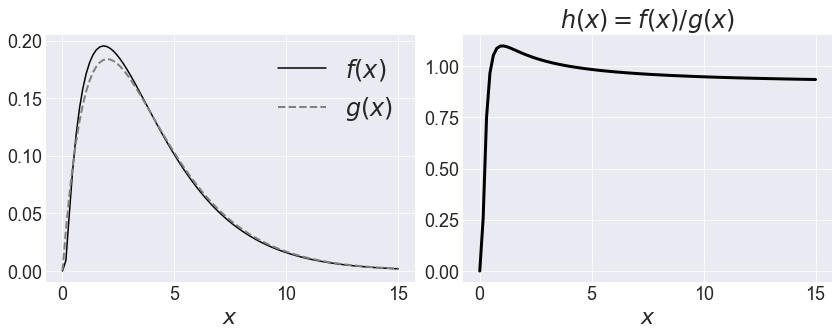

In [57]:
fig,axs=plt.subplots(1,2,sharex=True,figsize=(12,5))
axs[0].plot(x,f(x),label='$f(x)$',color='k')
axs[0].plot(x,ch.pdf(x),'--',lw=2,label='$g(x)$',color='gray')
axs[0].legend(loc=0,fontsize=24)
axs[0].set_xlabel(r'$x$',fontsize=22)

axs[1].plot(x,h(x),'-k',lw=3)
axs[1].set_title('$h(x)=f(x)/g(x)$',fontsize=24)
axs[1].set_xlabel(r'$x$',fontsize=22)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_009.png')

O gráfico à direita mostra $h(x)=f(x)/g(x)$ e o da esquerda mostra $f(x)$ e $g(x)$ separadamente.

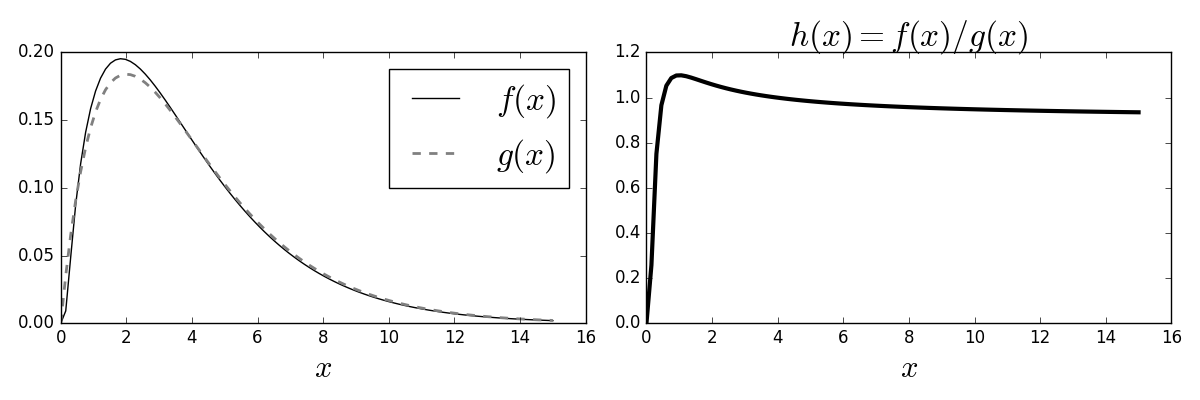

Agora, vamos gerar algumas amostras deste $\chi^2$ distribuição com o método de rejeição.

In [58]:
hmax = h(x).max()
u1 = ch.rvs(5000)        # samples from chi-square distribution
u2 = np.random.rand(5000)# uniform random samples
idx = (u2 <= h(u1)/hmax) # rejection criterion
v = u1[idx]              # keep these only

In [59]:
len(v)

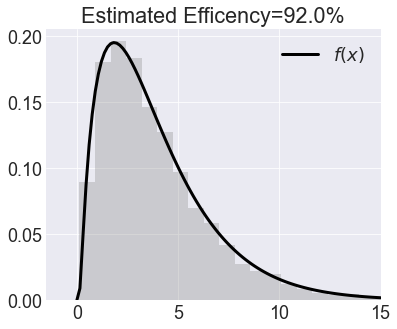

In [60]:
fig,ax=plt.subplots(figsize=(6,5))

ax.hist(v,density=True,bins=40,alpha=.3,color='gray')
ax.plot(x,f(x),color='k',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*len(v)/len(u1)))
ax.axis(xmax=15)
ax.legend(fontsize=18)
#fig.savefig('fig-probability/Sampling_Monte_Carlo_010.png')

Usando o método atualizado, o histograma corresponde à função de densidade de probabilidade alvo com alta eficiência.

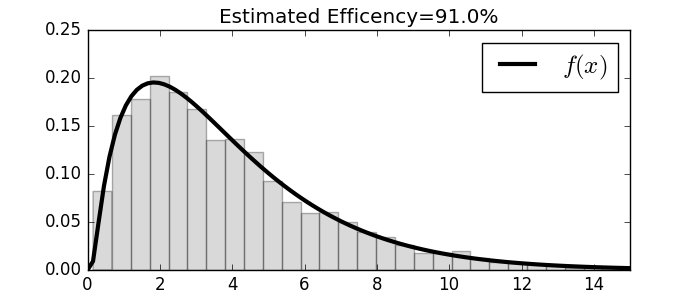

Usar a distribuição $\chi^2$ com o método de rejeição resulta em lançar
menos de 10% das amostras geradas em comparação com nosso exemplo anterior
onde jogamos fora pelo menos 80%. Isso é dramaticamente mais
eficiente. [Figura](#fig:Sampling_Monte_Carlo_010) mostra que o histograma
e a correspondência da função de densidade de probabilidade. Para completar, a figura mostra as amostras com os correspondentes
limiar $h(x)/h_{\max}$ que foi usado para selecioná-los.

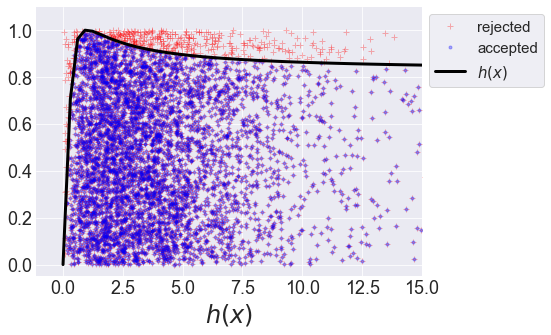

In [62]:
fig,ax = plt.subplots(figsize=(8,5))

x = np.linspace(0.01,15)

ax.plot(u1,u2,'+',label='rejected',alpha=.3,color='red')
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3,color='blue')
ax.plot(x,h(x)/hmax,color='k',lw=3.,label='$h(x)$')

ax.legend(fontsize=15,loc="upper left", bbox_to_anchor=(1,1),frameon=True,fancybox=True)
ax.set_xlabel('$x$',fontsize=24)
ax.set_xlabel('$h(x)$',fontsize=24)
ax.axis(xmax=15,ymax=1.1)
fig.tight_layout()
#fig.savefig('fig-probability/Sampling_Monte_Carlo_011.png')

Menos pontos propostos foram rejeitados neste caso, o que significa melhor eficiência.

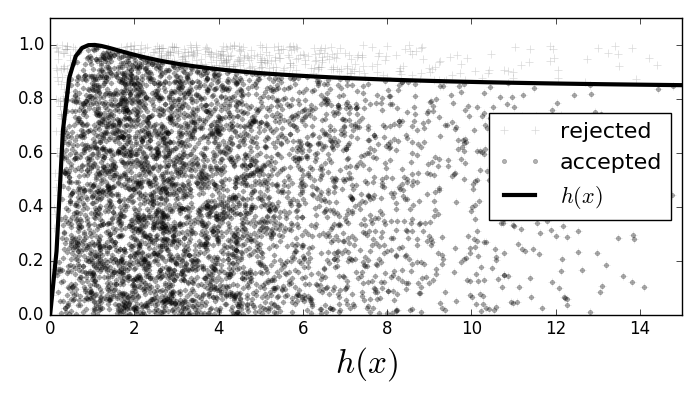

Nesta seção, investigamos como gerar amostras aleatórias a partir de um dado
distribuição, seja discreta ou contínua. Para o caso contínuo, a tecla
A questão era se a função de densidade cumulativa tinha ou não uma função contínua.
inverso. Caso contrário, tínhamos que recorrer ao método de rejeição e encontrar um
densidade relacionada apropriada que poderíamos facilmente amostrar para usar como parte de
um limite de rejeição. Encontrar tal função é uma arte, mas muitas famílias de
densidades de probabilidade foram estudadas ao longo dos anos que já têm rápido
geradores de números aleatórios.

O método de rejeição tem muitas extensões complicadas que envolvem
particionamento dos domínios e muitos métodos especiais para casos extremos.
No entanto, todas essas técnicas avançadas ainda são variações do mesmo
tema fundamental que ilustramos aqui.

In [63]:
from pprint import pprint
import textwrap
import sys, re

# Desigualdades Úteis

Na prática, poucas quantidades podem ser calculadas analiticamente. algum conhecimento
de desigualdades delimitadoras ajuda a encontrar a estimativa para possíveis soluções. este
seções discute três desigualdades principais que são importantes para
probabilidade, estatística e aprendizado de máquina.

## Desigualdade de Markov

Seja $X$ uma variável aleatória não negativa
e suponha que $\mathbb{E}(X) < \infty$. Então,
para qualquer $t>0$,

$$
\mathbb{P}(X>t)\leq \frac{\mathbb{E}(X)}{t}
$$

Esta é uma desigualdade fundamental que é
usado como trampolim para outras desigualdades. Isso é fácil
provar. Como $X>0$, temos o seguinte,

$$
\begin{align*}
\mathbb{E}(X)&=\int_0^\infty x f_x(x)dx =\underbrace{\int_0^t x f_x(x)dx}_{\text{omit this}}+\int_t^\infty x f_x(x)dx \\\ 
             &\ge\int_t^\infty x f_x(x)dx \ge t\int_t^\infty f_x(x)dx = t \mathbb{P}(X>t)
\end{align*}
$$

O passo que estabelece a desigualdade é a parte onde o
$\int_0^t x f_x(x)dx$ é omitido. Para um determinado $f_x(x)$ que pode ser
concentrado em torno do intervalo $[0,t]$, isso pode ser muito para jogar fora.
Por essa razão, a Desigualdade de Markov é considerada uma desigualdade *frouxa*,
o que significa que há uma lacuna substancial entre os dois lados da desigualdade.
Por exemplo, conforme mostrado na [Figura](#fig:ProbabilityInequalities_001), o
A distribuição $\chi^2$ tem grande parte de sua massa à esquerda, o que seria omitido
na Desigualdade de Markov. [Figura](#fig:ProbabilityInequalities_002) mostra
as duas curvas estabelecidas pela Desigualdade de Markov. A região sombreada em cinza é
a lacuna entre os dois termos e indica que a frouxidão do limite
(região sombreada mais gorda) para este caso.

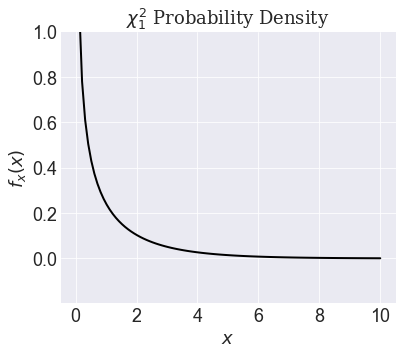

In [64]:
fig,ax = plt.subplots(figsize=(6,5))
xi = np.linspace(0.01,10,100)
chisq=scipy.stats.chi2(1)
ax.plot(xi,chisq.pdf(xi),color='k',lw=2)
ax.axis(ymax=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$f_x(x)$')
ax.set_title(r'$\chi_1^2$ Probability Density',fontsize=18,fontdict={'family':'serif'});

In [65]:
chisq.mean()

Text(0.5, 1.0, "Markov's Inequality")

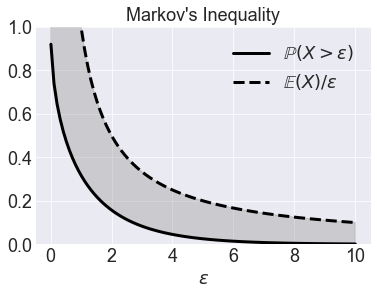

In [66]:
fig,ax= plt.subplots()

ax.plot(xi,1-chisq.cdf(xi),label=r'$\mathbb{P}(X>\epsilon)$',color='k',linestyle='-',lw=3)
ax.plot(xi,1/xi,label=r'$\mathbb{E}(X)/\epsilon$',lw=3,color='k',ls='--')

ax.fill_between(xi,1-chisq.cdf(xi),1/xi,color='gray',alpha=.3)

ax.axis(ymax=1,ymin=0)
ax.set_xlabel('$\epsilon$',fontsize=18)
ax.legend(fontsize=18)
ax.set_title("Markov's Inequality",fontsize=18)

A densidade $\chi_1^2$ tem grande parte de seu peso à esquerda, que é excluída no estabelecimento da Desigualdade de Markov.

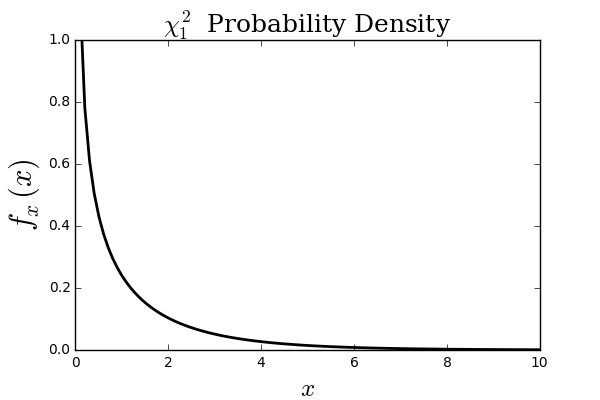

A área sombreada mostra a região entre as curvas em ambos os lados da Desigualdade de Markov.



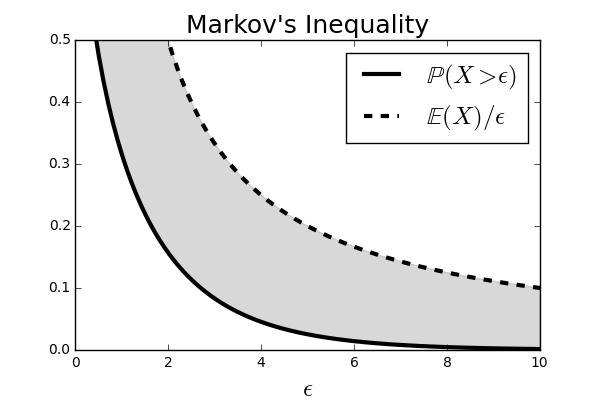

## Desigualdade de Chebyshev

A Desigualdade de Chebyshev sai diretamente da Desigualdade de Markov. Deixar
$\mu=\mathbb{E}(X)$ e $\sigma^2=\mathbb{V}(X)$. Então nós temos

$$
\mathbb{P}(\vert X-\mu\vert \ge t) \le \frac{\sigma^2}{t^2}
$$

Note que se normalizarmos de forma que $Z=(X-\mu)/\sigma$, teremos
tem $\mathbb{P}(\vert Z\vert \ge k) \le 1/k^2$. Em particular,
$\mathbb{P}(\vert Z\vert \ge 2) \le 1/4$. Podemos ilustrar isso
desigualdade usando o módulo de estatísticas Sympy,

In [67]:
t = S.symbols('t',real=True)
x = S.stats.ChiSquared('x',1)

Para obter o lado esquerdo da desigualdade de Chebyshev, nós
tem que escrever isso como a seguinte probabilidade condicional,

In [68]:
S.stats.E(x)

In [69]:
S.stats.variance(x)

In [ ]:
r = S.stats.P((x-1) > t,x>1) + S.stats.P(-(x-1) > t,x<1)

In [ ]:
S.simplify(r)

Expoente m Isso ocorre devido a certas limitações no módulo de estatísticas em
este ponto em seu desenvolvimento em relação à função de valor absoluto. Poderíamos
pegue a expressão acima, que é uma função de $t$ e tente calcular
a integral, mas isso levaria muito tempo (a expressão é muito longa
e complicado, por isso não o imprimimos acima). Isto é porque
Sympy é um módulo puro-python que não utiliza nenhuma otimização de nível C
sob o capô. Nesta situação, é melhor usar o built-in cumulativo
função de densidade como a seguir (após algum rearranjo dos termos), deve ser um inteiro positivo

In [76]:
w = (1-S.stats.cdf(x)(t+1))+S.stats.cdf(x)(1-t)

In [77]:
w

⎛⎧   ⎛     _______⎞               ⎞   ⎛⎧   ⎛     _______⎞               ⎞    
⎜⎪   ⎜√2⋅╲╱ 1 - t ⎟               ⎟   ⎜⎪   ⎜√2⋅╲╱ t + 1 ⎟               ⎟    
⎜⎪erf⎜────────────⎟  for t - 1 ≤ 0⎟   ⎜⎪erf⎜────────────⎟  for t + 1 ≥ 0⎟    
⎜⎨   ⎝     2      ⎠               ⎟ - ⎜⎨   ⎝     2      ⎠               ⎟ + 1
⎜⎪                                ⎟   ⎜⎪                                ⎟    
⎜⎪        0            otherwise  ⎟   ⎜⎪        0            otherwise  ⎟    
⎝⎩                                ⎠   ⎝⎩                                ⎠    

Para plotar isso, podemos avaliar uma variedade de valores `t` usando
o método de substituição `.subs`, mas é mais conveniente usar o
`lambdify` para converter a expressão em uma função.

In [78]:
fw = S.lambdify(t,w)

Então, podemos avaliar essa função usando algo como

In [79]:
list(map(fw,[0,1,2,3,4]))

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(t - 1, 0),True], [erf((1/2)*sqrt(2)*sqrt(1 - t)),0], default=nan) - select([greater_equal(t + 1, 0),True], [erf((1/2)*sqrt(2)*sqrt(t + 1)),0], default=nan) + 1)


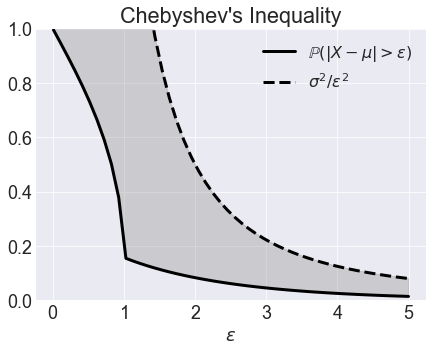

In [80]:
fig,ax = plt.subplots(figsize=(7,5))
ti = np.linspace(.01,5)
fvals = list(map(fw,ti))

ax.plot(ti,fvals,'k',lw=3,label=r'$\mathbb{P}(\vert X-\mu\vert > \epsilon)$')
ax.plot(ti,2/ti**2,'k--',lw=3,label=r'$\sigma^2/\epsilon^2$')
ax.fill_between(ti,fvals,2/ti**2,color='gray',alpha=.3)
ax.axis(ymax=1,ymin=0)
ax.set_xlabel('$\epsilon$',fontsize=18)
ax.set_title("Chebyshev's Inequality")
ax.legend(fontsize=16)

Para produzir a seguinte figura, a área sombreada mostra a região entre as curvas em ambos os lados da Desigualdade de Chebyshev.

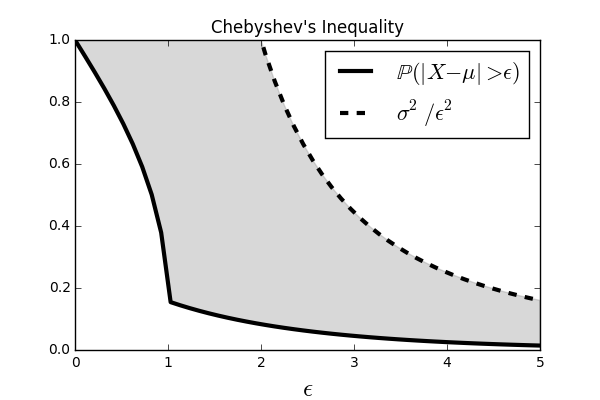

**Dica de programação.**

Observe que não podemos usar entradas vetorizadas para a função `lambdify` porque
ele contém funções incorporadas que estão disponíveis apenas no Sympy. Caso contrário, nós
poderia ter usado `lambdify(t,fw,numpy)` para especificar as funções correspondentes
em Numpy para usar para a expressão.



## Desigualdade de Hoeffding
<div id="ch:prob:sec:ineq"></div>

A Desigualdade de Hoeffding é semelhante, mas menos frouxa, do que a Desigualdade de Markov.
Sejam $X_1,\ldots,X_n$ observações iid tais que $\mathbb{E}(X_i)=\mu$ e
$a\le X_i \le b$. Então, para qualquer $\epsilon>0$, temos

$$
\mathbb{P}(\vert \overline{X}_n -\mu\vert \ge \epsilon) \le 2 \exp(-2 n\epsilon^2/(b-a)^2)
$$

Onde $\overline{X}_n = \tfrac{1}{n}\sum_i^n X_i$. Observe que nós
assume ainda que as variáveis ​​aleatórias individuais são limitadas.

**Corolário.** Se $X_1,\ldots,X_n$ são independentes com $\mathbb{P}(a\le X_i\le b)=1$
e tudo com $\mathbb{E}(X_i)=\mu$. Então nós temos

$$
\vert\overline{X}_n-\mu\vert \le \sqrt{\frac{c}{2 n}\log \frac{2}{\delta}}
$$

Onde $c=(b-a)^2$. Veremos essa desigualdade novamente na máquina
capítulo de aprendizagem. A figura mostra o Markov
e limites de Hoeffding para o caso de dez uniformemente distribuídos
variáveis ​​aleatórias, $X_i \sim \mathcal{U}[0,1]$. A linha contínua mostra
$\mathbb{P}(\vert \overline{X}_n - 1/2 \vert > \epsilon)$. Observe que o
A desigualdade de Hoeffding é mais estreita do que a desigualdade de Markov e ambas
eles se fundem quando $\epsilon$ fica grande o suficiente.

Isso mostra os limites de Markov e Hoeffding para o caso de dez variáveis ​​aleatórias distribuídas de forma idêntica e uniforme.

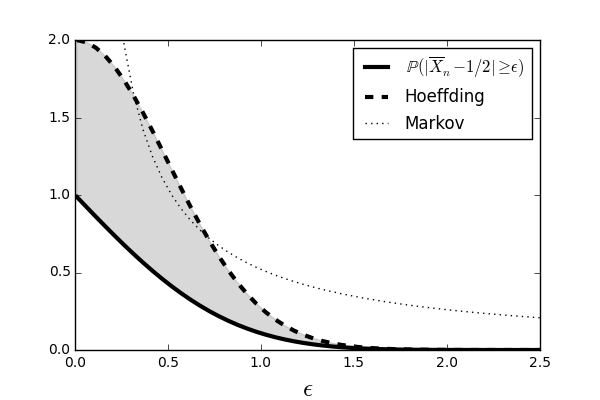

In [81]:
x = S.stats.Uniform('x',0,1)

In [82]:
S.stats.sample(x)

C:\Users\Vitor\anaconda3\lib\site-packages\sympy\stats\rv.py:1126: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))


<generator object sample_iter.<locals>.return_generator_finite at 0x000001478E4ACB30>

In [83]:
S.stats.E(x,numsamples=10)

In [84]:
def pgeps(eps,n=10,samples=10000):
    cond = np.asarray([np.abs(S.stats.E(x,numsamples=n) - 0.5)>eps for _ in range(samples)])
    
    return(len(cond[cond==True])/samples)

In [85]:
epss= np.linspace(0.01,1)

In [86]:
from multiprocessing import Pool

In [ ]:
pool = Pool()

In [ ]:
pgeps_l = pool.map(pgeps,epss)

In [ ]:
pgeps_l

In [ ]:
pgeps_l = np.asarray(pgeps_l)

In [ ]:
pool.terminate()

In [ ]:
f, ax = plt.subplots(figsize=(6,5))
ax.plot(epss,pgeps_l,'-k',label=r'$\mathbb{P}(\vert \overline{X}_n-1/2\vert \geq \epsilon)$',lw=3)
ax.plot(epss, 2*np.exp(-2*10*epss**2),label='Hoeffding',color='k',ls='--',lw=3)
ax.fill_between(epss,pgeps_l,2*np.exp(-2*10*epss**2),color='gray',alpha=0.3)
ax.plot(epss,0.5/epss,label='Markov',color='k',ls=':')

ax.legend(loc=0,fontsize=12)
ax.axis(ymax=2,ymin=0)
ax.set_xlabel('$\epsilon$',fontsize=18)